In [2]:
# Zadanie: ładowanie biblioteki Pandas + odrazu dodatkowe do późniejszych zadań
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
# Zadanie: tworzenie ramki danych ze słownika
dictCity = {
    "Name": ["Bielsko-Biała", "Żywiec", "Sucha Beskidzka"],
    "PostalCode": ["43-300", "34-300", "34-200"],
    "District": ["Śląsk", "Śląsk", "Małopolska"]
} 
dfCities = pd.DataFrame(dictCity)
print(dfCities)
# przykładowa ramka danych

              Name PostalCode    District
0    Bielsko-Biała     43-300       Śląsk
1           Żywiec     34-300       Śląsk
2  Sucha Beskidzka     34-200  Małopolska


In [4]:
# Zadanie: zachowanie ramki danych pobranych z pliku w formacie csv (xlsx)
csvPath = Path("IHME_PREM_GEN_POP_2020_Y2021M10D11.CSV") 
df = pd.read_csv(csvPath)
#print(df)

In [5]:
# Zadanie: tworzenie ramki danych z listy list
exampleList = [
    ["Bielsko-Biała", 5],
    ["Żywiec", 2], 
    ["Sucha Beskidzka", 1]]
dfFromExampleList = pd.DataFrame(exampleList, columns=["City","NumberOfStores"]) 
print(dfFromExampleList) #tworzenie ramki danych z listy

              City  NumberOfStores
0    Bielsko-Biała               5
1           Żywiec               2
2  Sucha Beskidzka               1


In [6]:
# Zadanie: transponowanie (wymieniamy kolumny a wierszy)
dfFromExampleListTransposed = dfFromExampleList.transpose()
print(dfFromExampleListTransposed)

                            0       1                2
City            Bielsko-Biała  Żywiec  Sucha Beskidzka
NumberOfStores              5       2                1


In [7]:
# Zadanie: wyświetlić pierwsze 10 wierszy ramki danych i wyświetlić ostatnie 10 wierszy ramki danych
print(df.head(10)) #wyświetlenie pierwszych 10 wierszy z ramki
print(df.tail(10)) #wyświetlenie ostatnich 10 wierszy z ramki

        observation_id               submitted_time  gender  \
0  gp_4503617949401088   2020-07-07 14:48:29.83 UTC    Male   
1  gp_4503631639609344  2020-07-09 13:22:37.107 UTC  Female   
2  gp_4503700758593536  2020-07-04 18:53:36.471 UTC    Male   
3  gp_4503737805832192  2020-07-12 17:58:20.798 UTC    Male   
4  gp_4503819343101952  2020-07-06 00:20:22.983 UTC    Male   
5  gp_4503868601008128  2020-07-11 17:45:09.631 UTC    Male   
6  gp_4503890878005248  2020-07-02 03:40:45.482 UTC  Female   
7  gp_4503892958380032   2020-06-30 23:29:02.38 UTC  Female   
8  gp_4503911114473472  2020-07-24 17:48:36.569 UTC    Male   
9  gp_4503919402418176  2020-07-01 21:39:57.055 UTC    Male   

                  age                         geography  \
0            Under 16               Suburban/Peri-urban   
1  26 to 35 years old  City center or metropolitan area   
2  36 to 45 years old  City center or metropolitan area   
3  26 to 35 years old                             Rural   
4  26 to 35

In [8]:
# Zadanie: wyświetlić informacje˛ o ramce danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52490 entries, 0 to 52489
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   observation_id                    52490 non-null  object 
 1   submitted_time                    52490 non-null  object 
 2   gender                            52469 non-null  object 
 3   age                               52490 non-null  object 
 4   geography                         52490 non-null  object 
 5   financial_situation               52490 non-null  object 
 6   education                         52490 non-null  object 
 7   employment_status                 52490 non-null  object 
 8   ethnicity                         52490 non-null  object 
 9   religion                          52490 non-null  object 
 10  gp_hh                             52478 non-null  object 
 11  gp_pre_provider_need              52490 non-null  object 
 12  gp_p

In [9]:
# Zadanie: wyświetlić, ile wierszy i kolumn znajduje sie w ramce danych
rows, columns = df.shape
print(f"Liczba wierszy: {rows}")
print(f"Liczba kolumn: {columns}\n")

Liczba wierszy: 52490
Liczba kolumn: 48



In [10]:
# Zadanie: wyświetlić informacje˛ statystyczna˛ o kolumnach liczbowych (wartości niepowtarzalne, średnia, odchylenie standardowe, minimum, kwartyle, maksimum)

ColumnNumbers = df.select_dtypes(include="number").columns
if len(ColumnNumbers) > 0:
    descNumbers = df[ColumnNumbers].describe().transpose()  #count, mean, std, min, 25%, 50%, 75%, max
    descNumbers["unique"] = df[ColumnNumbers].nunique().values  # dodaj liczbę unikalnych
    # Uporządkuj kolejność kolumn:
    descNumbers = descNumbers[["count", "unique", "mean", "std", "min", "25%", "50%", "75%", "max"]]
    print("Statystyki kolumn liczbowych:")
    print(descNumbers)
else:
    print("Brak kolumn liczbowych.")
print()

Statystyki kolumn liczbowych:
                  count  unique          mean           std  min         25%  \
gp_pre_income   52490.0    2822  1.905125e+56  4.364774e+58  0.0  150.000000   
gp_post_income  52490.0    2880  1.905125e+59  4.364774e+61  0.0   70.000000   
weight          52490.0    1726  1.795820e+00  3.845066e-01  1.0    1.544666   

                        50%           75%           max  
gp_pre_income   3425.000000  25000.000000  1.000000e+61  
gp_post_income  2000.000000  20000.000000  1.000000e+64  
weight             1.730488      1.908871  6.411420e+00  



In [11]:
# Zadanie: wyświetlić informacje˛ statystyczna˛ o kolumnach kategoryzowanych (ileunikalnych wartości, top - jaka jest najpopularniejsza warto´s´c, freq -jak cze˛sto najpopularniejsza)

categoryColumns = df.select_dtypes(include=["object", "category", "bool"]).columns
if len(categoryColumns) > 0:
    # describe(include='object') zwraca count, unique, top, freq
    descCategorys = df[categoryColumns].describe().transpose()
    print("Statystyki kolumn kategoryzowanych:")
    print(descCategorys)  # zawiera: count, unique, top, freq
else:
    print("Brak kolumn kategoryzowanych.")
print()

Statystyki kolumn kategoryzowanych:
                                  count unique  \
observation_id                    52490  52490   
submitted_time                    52490  52484   
gender                            52469      3   
age                               52490      6   
geography                         52490      4   
financial_situation               52490      6   
education                         52490      8   
employment_status                 52490      8   
ethnicity                         52490    197   
religion                          52490     44   
gp_hh                             52478     21   
gp_pre_provider_need              52490      2   
gp_pre_provider_condition         21777   1328   
gp_pre_provider_condition_other    2982      1   
gp_pre_provider_visit             21777      3   
gp_pre_provider_where              9972     16   
gp_pre_provider_where_other         803      1   
gp_pre_provider_num_visit         19037     11   
gp_pre_provide

In [12]:
# Zadanie: usunąć brakujące wartości w ramce danych
before = len(df)
dfCopyToDeletion = df
dfClean = dfCopyToDeletion.dropna()  # usuwa każdy wiersz zawierający co najmniej jedną wartość NaN
after = len(dfClean)
deletion = before - after
print(f"Usunięto wierszy z brakami: {deletion}")
print(f"Liczba wierszy po czyszczeniu: {after}")

Usunięto wierszy z brakami: 52490
Liczba wierszy po czyszczeniu: 0


In [13]:
# Zadanie: przedstawić wybór wierszy i kolumny używając nazw oraz indeksów na różne sposoby
# --- DWA SPOSOBY WYBORU WIERSZY I KOLUMN np. (loc i iloc) ---

# 1) WYBÓR PO NAZWACH (etykietach) → .loc
#    Wybierz pierwsze 5 wierszy (etykiety 0..4) oraz 2 sensowne kolumny po NAZWACH
CANDS = ["observation_id", "age", "gender", "geography", "education"]
cols = [c for c in CANDS if c in df.columns][:2]
if len(cols) < 2:
    cols = list(df.columns[:2])  # awaryjnie: pierwsze 2 kolumny z ramki
subset_loc = df.loc[0:4, cols]
print("loc – wiersze 0..4, kolumny po nazwach:", cols)
print(subset_loc)

# 2) WYBÓR PO POZYCJACH (indeksach) → .iloc
#    Wybierz wiersze o pozycjach 0..4 oraz kolumny o pozycjach 0..1
subset_iloc = df.iloc[0:5, 0:2]
print("\niloc – wiersze [0:5), kolumny [0:2)")
print(subset_iloc)

loc – wiersze 0..4, kolumny po nazwach: ['observation_id', 'age']
        observation_id                 age
0  gp_4503617949401088            Under 16
1  gp_4503631639609344  26 to 35 years old
2  gp_4503700758593536  36 to 45 years old
3  gp_4503737805832192  26 to 35 years old
4  gp_4503819343101952  26 to 35 years old

iloc – wiersze [0:5), kolumny [0:2)
        observation_id               submitted_time
0  gp_4503617949401088   2020-07-07 14:48:29.83 UTC
1  gp_4503631639609344  2020-07-09 13:22:37.107 UTC
2  gp_4503700758593536  2020-07-04 18:53:36.471 UTC
3  gp_4503737805832192  2020-07-12 17:58:20.798 UTC
4  gp_4503819343101952  2020-07-06 00:20:22.983 UTC


In [14]:
# Zadanie: przedstawić wybór wierszy z ramki danych pod warunkiem odnośnie okreslonej wartości kolumny
if "gender" in df.columns:
    dfWhenGenderIsMale = df.loc[df["gender"] == "Male"]
    print(dfWhenGenderIsMale)

            observation_id               submitted_time gender  \
0      gp_4503617949401088   2020-07-07 14:48:29.83 UTC   Male   
2      gp_4503700758593536  2020-07-04 18:53:36.471 UTC   Male   
3      gp_4503737805832192  2020-07-12 17:58:20.798 UTC   Male   
4      gp_4503819343101952  2020-07-06 00:20:22.983 UTC   Male   
5      gp_4503868601008128  2020-07-11 17:45:09.631 UTC   Male   
...                    ...                          ...    ...   
52479  gp_6754889918316544  2020-07-26 11:23:17.612 UTC   Male   
52480  gp_6754948870307840  2020-07-11 12:56:55.947 UTC   Male   
52481  gp_6754985514893312  2020-07-04 11:10:53.948 UTC   Male   
52483  gp_6755006248386560  2020-07-02 08:59:47.083 UTC   Male   
52486  gp_6755213279232000  2020-07-02 07:07:44.269 UTC   Male   

                      age                         geography  \
0                Under 16               Suburban/Peri-urban   
2      36 to 45 years old  City center or metropolitan area   
3      26 to 35 ye

In [15]:
# Zadanie: przedstawić wybór wierszy z ramki danych pod warunkiem spełnienia kilku warunków jednocześnie
if ("gender" in df.columns) and ("gp_pre_income" in df.columns):
    dfWhenGenderIsMaleAndIncomeBelow3K = df.loc[
        (df["gender"] == "Male") & (df["gp_pre_income"] <= 3)
    ]
    print(dfWhenGenderIsMaleAndIncomeBelow3K)

            observation_id               submitted_time gender  \
9      gp_4503919402418176  2020-07-01 21:39:57.055 UTC   Male   
31     gp_4504798998298624  2020-07-04 01:33:52.677 UTC   Male   
36     gp_4504898319417344  2020-07-10 17:35:38.856 UTC   Male   
46     gp_4505369826295808  2020-07-01 18:54:25.341 UTC   Male   
102    gp_4507575087529984  2020-07-02 05:53:35.373 UTC   Male   
...                    ...                          ...    ...   
52444  gp_6753597972021248  2020-07-13 19:45:27.264 UTC   Male   
52452  gp_6753877343076352  2020-07-01 14:49:48.868 UTC   Male   
52457  gp_6754111354830848  2020-07-01 04:46:18.212 UTC   Male   
52473  gp_6754570681450496  2020-07-15 21:17:03.909 UTC   Male   
52483  gp_6755006248386560  2020-07-02 08:59:47.083 UTC   Male   

                      age                         geography  \
9                Under 16                             Rural   
31     16 to 25 years old  City center or metropolitan area   
36     16 to 25 ye

In [16]:
# Zadanie: wybrać wiersze które zawierają w kolumnie kategoryzowanej określone słowo
if ("geography" in df.columns):
    dfGeoWhenContainsEuropeWord = df[df["country"].astype(str).str.contains("united", case=False, na=False)]
    print(dfGeoWhenContainsEuropeWord)

            observation_id               submitted_time  gender  \
2      gp_4503700758593536  2020-07-04 18:53:36.471 UTC    Male   
22     gp_4504459226120192  2020-07-02 18:06:38.962 UTC    Male   
79     gp_4506455510351872  2020-07-08 11:28:21.549 UTC    Male   
95     gp_4507104389103616  2020-07-02 15:03:50.961 UTC  Female   
103    gp_4507599451193344  2020-07-04 13:21:27.221 UTC    Male   
...                    ...                          ...     ...   
52436  gp_6753007816671232  2020-07-05 02:49:09.313 UTC    Male   
52437  gp_6753113110478848  2020-07-11 22:23:32.729 UTC  Female   
52454  gp_6753980224110592   2020-07-03 17:37:34.68 UTC    Male   
52455  gp_6753989686460416  2020-07-09 19:31:08.381 UTC  Female   
52472  gp_6754557762994176  2020-07-09 19:04:15.968 UTC  Female   

                      age                         geography  \
2      36 to 45 years old  City center or metropolitan area   
22     26 to 35 years old                             Rural   
79    

In [17]:
# Zadanie: wybrać wiersze które nie zawierają w kolumnie kategoryzowanej określone słowo
if "country" in df.columns:
    mask = df["country"].astype(str).str.contains(r"\bunited\b", case=False, na=False, regex=True)
    print(df[~mask])     # nie zawiera

            observation_id               submitted_time  \
0      gp_4503617949401088   2020-07-07 14:48:29.83 UTC   
1      gp_4503631639609344  2020-07-09 13:22:37.107 UTC   
3      gp_4503737805832192  2020-07-12 17:58:20.798 UTC   
4      gp_4503819343101952  2020-07-06 00:20:22.983 UTC   
5      gp_4503868601008128  2020-07-11 17:45:09.631 UTC   
...                    ...                          ...   
52485  gp_6755106844573696  2020-07-02 12:37:51.894 UTC   
52486  gp_6755213279232000  2020-07-02 07:07:44.269 UTC   
52487  gp_6755237508677632  2020-07-02 10:26:38.461 UTC   
52488  gp_6755275458740224  2020-07-24 23:16:52.556 UTC   
52489  gp_6755355351842816  2020-07-02 13:33:00.269 UTC   

                      gender                 age  \
0                       Male            Under 16   
1                     Female  26 to 35 years old   
3                       Male  26 to 35 years old   
4                       Male  26 to 35 years old   
5                       Male  2

In [18]:
# Zadanie: utwórz kolumnę na podstawie istniejących
df["income_difference"] = df["gp_post_income"] - df["gp_pre_income"]
print(df)

            observation_id               submitted_time  \
0      gp_4503617949401088   2020-07-07 14:48:29.83 UTC   
1      gp_4503631639609344  2020-07-09 13:22:37.107 UTC   
2      gp_4503700758593536  2020-07-04 18:53:36.471 UTC   
3      gp_4503737805832192  2020-07-12 17:58:20.798 UTC   
4      gp_4503819343101952  2020-07-06 00:20:22.983 UTC   
...                    ...                          ...   
52485  gp_6755106844573696  2020-07-02 12:37:51.894 UTC   
52486  gp_6755213279232000  2020-07-02 07:07:44.269 UTC   
52487  gp_6755237508677632  2020-07-02 10:26:38.461 UTC   
52488  gp_6755275458740224  2020-07-24 23:16:52.556 UTC   
52489  gp_6755355351842816  2020-07-02 13:33:00.269 UTC   

                      gender                 age  \
0                       Male            Under 16   
1                     Female  26 to 35 years old   
2                       Male  36 to 45 years old   
3                       Male  26 to 35 years old   
4                       Male  2

In [19]:
# Zadanie: zmień nazwę kolumny
if "income_difference" in df.columns:
    df.rename(columns={"income_difference": "income_delta"}, inplace=True)
print(df)

            observation_id               submitted_time  \
0      gp_4503617949401088   2020-07-07 14:48:29.83 UTC   
1      gp_4503631639609344  2020-07-09 13:22:37.107 UTC   
2      gp_4503700758593536  2020-07-04 18:53:36.471 UTC   
3      gp_4503737805832192  2020-07-12 17:58:20.798 UTC   
4      gp_4503819343101952  2020-07-06 00:20:22.983 UTC   
...                    ...                          ...   
52485  gp_6755106844573696  2020-07-02 12:37:51.894 UTC   
52486  gp_6755213279232000  2020-07-02 07:07:44.269 UTC   
52487  gp_6755237508677632  2020-07-02 10:26:38.461 UTC   
52488  gp_6755275458740224  2020-07-24 23:16:52.556 UTC   
52489  gp_6755355351842816  2020-07-02 13:33:00.269 UTC   

                      gender                 age  \
0                       Male            Under 16   
1                     Female  26 to 35 years old   
2                       Male  36 to 45 years old   
3                       Male  26 to 35 years old   
4                       Male  2

In [20]:
# Zadanie: usuń kolumnę
if "income_delta" in df.columns:
    df.drop(columns=["income_delta"], inplace=True, errors="ignore")
    print(df)

            observation_id               submitted_time  \
0      gp_4503617949401088   2020-07-07 14:48:29.83 UTC   
1      gp_4503631639609344  2020-07-09 13:22:37.107 UTC   
2      gp_4503700758593536  2020-07-04 18:53:36.471 UTC   
3      gp_4503737805832192  2020-07-12 17:58:20.798 UTC   
4      gp_4503819343101952  2020-07-06 00:20:22.983 UTC   
...                    ...                          ...   
52485  gp_6755106844573696  2020-07-02 12:37:51.894 UTC   
52486  gp_6755213279232000  2020-07-02 07:07:44.269 UTC   
52487  gp_6755237508677632  2020-07-02 10:26:38.461 UTC   
52488  gp_6755275458740224  2020-07-24 23:16:52.556 UTC   
52489  gp_6755355351842816  2020-07-02 13:33:00.269 UTC   

                      gender                 age  \
0                       Male            Under 16   
1                     Female  26 to 35 years old   
2                       Male  36 to 45 years old   
3                       Male  26 to 35 years old   
4                       Male  2

In [21]:
# Zadanie: zachowaj ramke˛ danych jako plik csv na komputerze
df.to_csv("saved_transferred_covid_data.csv")

In [22]:
# Zadanie: wyświetlić średnią (maksymalna, minimalna˛) wartość z jednej kolumny
s = pd.to_numeric(df["gp_hh"], errors="coerce")
print("mean:", s.mean())
print("max:", s.max())
print("min:", s.min())

mean: 4.179003932868658
max: 19.0
min: 1.0


In [23]:
# Zadanie: wyświetlić liczbę wierszy
print(df.shape[0]) # aby nie miało znaczniea NaN

52490


In [24]:
# Zadanie: wyświetlić wartości unikatowe w kolumnie
df['gp_hh'].unique()

array(['1', '3', '4', '7', '9', '6', '8', '2', '10', '5', 'did not exist',
       '13', '12', '15', '11', '20 and over', '16', '14', '19', '18',
       '17', nan], dtype=object)

In [25]:
# Zadanie: wyświetlić liczby rekordów odpowiadających do wartości
catCol = next((c for c in ["gender", "geography", "country", "education"] if c in df.columns), df.columns[0])
numCol = next((c for c in ["gp_post_income", "gp_pre_income", "age", "gp_hh"] if c in df.columns), None)

countsByValue = df[catCol].value_counts(dropna=False)
print(countsByValue)

gender
Male                     34876
Female                   16796
Prefer not to respond      797
NaN                         21
Name: count, dtype: int64


In [26]:
# Zadanie: sortowanie wierszy ramki danych według wartości określonej kolumny (malejąco, rosnąco)
if numCol is not None:
    sortedAsc = df.sort_values(by=numCol, ascending=True)
    sortedDesc = df.sort_values(by=numCol, ascending=False)
    print(sortedAsc)

            observation_id               submitted_time  gender  \
26244  gp_5637882305052672  2020-07-02 06:50:45.692 UTC    Male   
15766  gp_5181833684975616  2020-07-12 21:44:22.307 UTC  Female   
46621  gp_6504838902054912   2020-07-03 07:32:33.88 UTC    Male   
15778  gp_5182362704150528   2020-07-01 21:42:05.16 UTC    Male   
46618  gp_6504600397152256  2020-07-06 07:58:57.532 UTC  Female   
...                    ...                          ...     ...   
25937  gp_5624754133532672  2020-07-13 23:56:19.773 UTC    Male   
38168  gp_6140999538835456  2020-07-06 05:30:52.012 UTC    Male   
50242  gp_6659472455106560  2020-07-13 10:04:19.226 UTC    Male   
45777  gp_6467653612077056  2020-07-08 22:56:22.041 UTC    Male   
21644  gp_5434595865788416  2020-07-09 02:21:38.251 UTC    Male   

                      age                         geography  \
26244  16 to 25 years old               Suburban/Peri-urban   
15766  26 to 35 years old               Suburban/Peri-urban   
46621 

In [27]:
# Zadanie: wyświetlić wierszy dla 10 największych (najmniejszych) wartości określonej kolumny
if numCol is not None:
    top10 = df.nlargest(10, numCol)
    bottom10 = df.nsmallest(10, numCol)
    print(top10)

            observation_id               submitted_time  \
21644  gp_5434595865788416  2020-07-09 02:21:38.251 UTC   
45777  gp_6467653612077056  2020-07-08 22:56:22.041 UTC   
50242  gp_6659472455106560  2020-07-13 10:04:19.226 UTC   
38168  gp_6140999538835456  2020-07-06 05:30:52.012 UTC   
25937  gp_5624754133532672  2020-07-13 23:56:19.773 UTC   
17852  gp_5272493633044480  2020-07-22 05:29:30.767 UTC   
52362  gp_6750008986828800  2020-07-01 20:02:23.543 UTC   
1839   gp_4581886279286784  2020-07-01 22:31:20.845 UTC   
29610  gp_5781860480450560  2020-07-03 15:38:37.143 UTC   
26201  gp_5635895580688384  2020-07-13 10:34:26.326 UTC   

                      gender                 age  \
21644                   Male  16 to 25 years old   
45777                   Male  26 to 35 years old   
50242                   Male   Over 45 years old   
38168                   Male  16 to 25 years old   
25937                   Male   Over 45 years old   
17852                   Male  16 to 25

In [28]:
# Zadanie: wyświetlić wierszy dla 10 największych wartości określonej kolumny pod warunkiem określonych wartości innej kolumny
if numCol is not None:
    topCat = df[catCol].mode(dropna=True).iat[0] if not df[catCol].mode(dropna=True).empty else None
    condTop10 = df[df[catCol] == topCat].nlargest(10, numCol) if topCat is not None else df.head(0)

In [29]:
# Zadanie: grupowanie wierszy wedlug wartości kolumny kategoryzowanej, potem - uśrednienie wartości wszystkich kolumn w grupie - MultiIndex
groupMeanAll = df.groupby(catCol).mean(numeric_only=True)

In [30]:
# Zadanie: grupowanie wierszy wedlug wartości kolumny kategoryzowanej, potem uśrednienie wartoś0ci dla pewnych kolumn, liczba wartości i mediana
# dla pozostałych kolumn w grupach
aggDict = {}
if "age" in df.columns:
    df["age"] = pd.to_numeric(df["age"], errors="coerce")
    aggDict["age"] = ["mean", "median", "count"]
if "gp_post_income" in df.columns:
    aggDict["gp_post_income"] = ["mean", "median"]
if "gp_pre_income" in df.columns:
    aggDict["gp_pre_income"] = ["mean", "median"]
if "gp_hh" in df.columns:
    df["gp_hh"] = pd.to_numeric(df["gp_hh"], errors="coerce")
    aggDict["gp_hh"] = ["count", "median"]

groupMixed = df.groupby(catCol).agg(aggDict)

In [31]:
# Zadanie: wyświetlić nazwy kolumn indeksu złożonego
if isinstance(groupMixed.columns, pd.MultiIndex):
    multiindexColNames = groupMixed.columns.names
    multiindexLevels = [lvl.tolist() for lvl in groupMixed.columns.levels]

In [32]:
# Zadanie: sortowanie kolumny idenksu złożonego
if isinstance(groupMixed.columns, pd.MultiIndex):
    groupMixedSortedCols = groupMixed.sort_index(axis=1, level=1)

In [43]:
# Zadanie: stworzyć tabelę przystawną (pivot table) na podstawie ramki danych
otherCat = next((c for c in ["education", "employment_status", "religion", "ethnicity", "gender", "geography", "country"]
                  if c in df.columns and c != catCol), None)
if numCol is not None and otherCat is not None:
    pivot = pd.pivot_table(
        df,
        index=catCol,
        columns=otherCat,
        values=numCol,
        aggfunc="mean"
    )
else:
    pivot = pd.pivot_table(df, index=catCol, values=numCol, aggfunc="mean") if numCol is not None else pd.DataFrame()

In [34]:
# Zadanie: wyświetlić indeksy i kolumny tabeli przystawnej
pivotIndex = pivot.index
pivotColumns = pivot.columns
print(pivotIndex)
print(pivotColumns)

Index(['Female', 'Male', 'Prefer not to respond'], dtype='object', name='gender')
Index(['College or university', 'No formal education', 'Post graduate',
       'Prefer not to answer', 'Primary school', 'Secondary/high school',
       'Technical school'],
      dtype='object', name='education')


In [46]:
# Zadanie: utwórz indeks złożony tabeli przystawnej i wyświetl go
if otherCat is not None and numCol is not None:
    numBins = pd.qcut(df[numCol], q=4, duplicates="drop")
    pivotMulti = pd.pivot_table(
        df.assign(_num_bin=numBins),
        index=[catCol, "_num_bin"],
        values=numCol,
        aggfunc="mean"
    )
    pivotMultiIndex = pivotMulti.index
    print(pivotMulti)

                                         gp_post_income
gender                _num_bin                         
Female                (-0.001, 70.0]       5.881079e+00
                      (70.0, 2000.0]       8.273459e+02
                      (2000.0, 20000.0]    8.849059e+03
                      (20000.0, 1e+64]     3.735270e+09
Male                  (-0.001, 70.0]       8.659503e+00
                      (70.0, 2000.0]       8.295878e+02
                      (2000.0, 20000.0]    8.756401e+03
                      (20000.0, 1e+64]     1.103631e+60
Prefer not to respond (-0.001, 70.0]       9.553092e+00
                      (70.0, 2000.0]       8.315509e+02
                      (2000.0, 20000.0]    7.659025e+03
                      (20000.0, 1e+64]     4.098621e+10


C:\Users\artge\AppData\Local\Temp\ipykernel_12164\1484125470.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivotMulti = pd.pivot_table(


C:\Users\artge\AppData\Local\Temp\ipykernel_12164\588087590.py:51: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_w = data.groupby(grp_cols, group_keys=False).apply(winsorize_group)


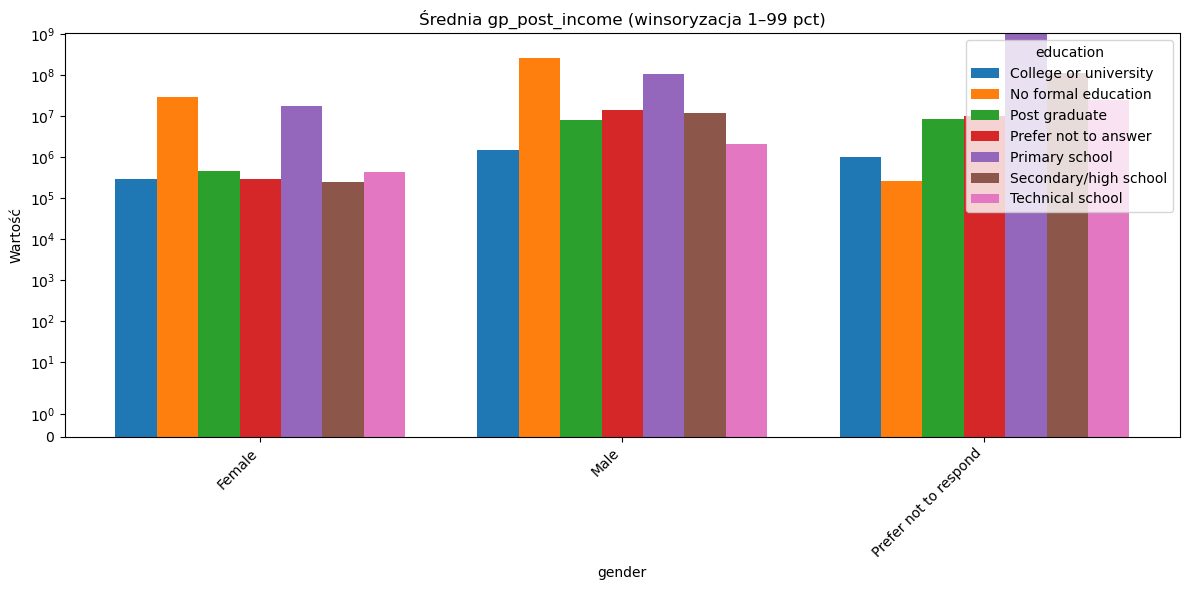

Uwaga: winsoryzacja zmodyfikowała 0.99% wartości w kolumnie 'gp_post_income'.


In [53]:
def draw_pivot_bar_clean(
    df: pd.DataFrame,
    numCol: str,
    catCol: str,
    otherCat: str | None = None,
    *,
    
    other_candidates=("education","employment_status","religion","ethnicity","gender","geography","country"),
    pct_low: float = 0.01,   # winsoryzacja 1–99% w każdej grupie
    pct_high: float = 0.99,
    title: str | None = None,
    figsize=(12,6),
    rotate_x: int = 45,
):

    if otherCat is None:
        otherCat = next((c for c in other_candidates if c in df.columns and c != catCol), None)

    
    s = (df[numCol].astype(str)
                  .str.replace(r"[^\d\.\-eE]", "", regex=True))
    s = pd.to_numeric(s, errors="coerce").replace([np.inf, -np.inf], np.nan)

    data = df.copy()
    data[numCol] = s
    data = data.dropna(subset=[numCol, catCol])
    if otherCat is not None:
        data = data.dropna(subset=[otherCat])

    if data.empty:
        print("Brak danych po wstępnym czyszczeniu.")
        return pd.DataFrame()

    
    grp_cols = [catCol] + ([otherCat] if otherCat else [])
    def winsorize_group(g: pd.DataFrame) -> pd.DataFrame:
        if g[numCol].notna().sum() < 5:
            return g
        lo, hi = g[numCol].quantile([pct_low, pct_high])
        
        if (g[numCol] >= 0).all():
            lo = max(0.0, lo)
        g = g.copy()
        g[numCol] = g[numCol].clip(lo, hi)
        return g

    data_w = data.groupby(grp_cols, group_keys=False).apply(winsorize_group)

    if otherCat is not None:
        pivot = pd.pivot_table(
            data_w, index=catCol, columns=otherCat, values=numCol, aggfunc="mean"
        )
    else:
        pivot = pd.pivot_table(
            data_w, index=catCol, values=numCol, aggfunc="mean"
        )

    if pivot.size == 0:
        print("Pivot pusty po winsoryzacji.")
        return pivot

    plot_data = pivot.fillna(0.0).sort_index()
    try:
        plot_data = plot_data.reindex(sorted(plot_data.columns, key=lambda x: str(x)), axis=1)
    except Exception:
        pass

    fig, ax = plt.subplots(figsize=figsize)
    categories = plot_data.index.astype(str)

    if plot_data.shape[1] == 1:
        ax.bar(categories, plot_data.iloc[:, 0].values)
        ax.set_ylabel(str(plot_data.columns[0]))
    else:
        groups = [str(c) for c in plot_data.columns]
        n_cat, n_grp = len(categories), len(groups)
        x = np.arange(n_cat)
        width = 0.8 / max(1, n_grp)
        for j, g in enumerate(groups):
            ax.bar(x + (j - (n_grp - 1) / 2) * width, plot_data[g].values, width=width, label=g)
        ax.set_xticks(x)
        ax.legend(title=plot_data.columns.name if plot_data.columns.name else "Grupa")

    yvals = plot_data.values.flatten()
    yvals = yvals[np.isfinite(yvals)]
    if yvals.size and (yvals.max(initial=1) > 0) and (yvals.min(initial=0) >= 0):
        dyn = (yvals.max() / max(1e-12, yvals[yvals>0].min())) if (yvals>0).any() else 1
        if dyn > 1_000:  # próg można zaostrzyć/rozluźnić
            ax.set_yscale("symlog")

    ax.set_xticklabels(categories, rotation=rotate_x, ha="right")
    ax.set_title(title or f"Średnia {numCol} (winsoryzacja {int(pct_low*100)}–{int(pct_high*100)} pct)")
    ax.set_xlabel(plot_data.index.name or "Kategoria")
    ax.set_ylabel("Wartość")
    plt.tight_layout()
    plt.show()

    trimmed = (data[numCol] - data_w[numCol]).abs() > 0
    trimmed_ratio = 100 * trimmed.mean()
    print(f"Uwaga: winsoryzacja zmodyfikowała {trimmed_ratio:.2f}% wartości w kolumnie '{numCol}'.")
    return pivot

pivot = draw_pivot_bar_clean(df, numCol="gp_post_income", catCol="gender", otherCat="education")


count: 52490 unique: 2880 min: 0.0 max: 1e+64
q1/q50/q99: {0.01: 0.0, 0.5: 2000.0, 0.99: 102820586.32001123}


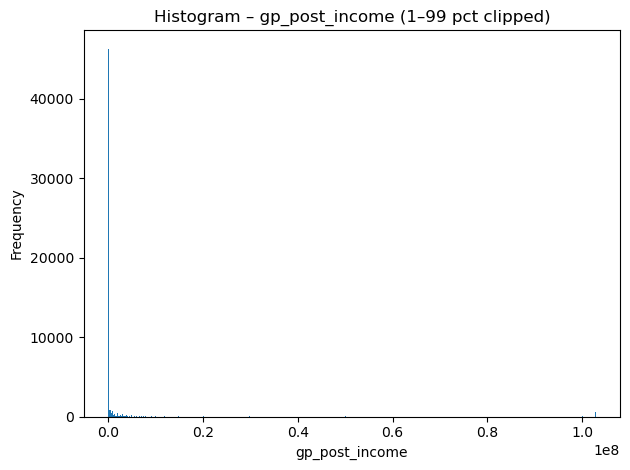

In [42]:
# Zadanie: # narysować histogram na podstawie wartości kolumny

s = pd.to_numeric(df[numCol], errors="coerce")
s = s.replace([np.inf, -np.inf], np.nan).dropna()

print("count:", s.size, "unique:", s.nunique(), "min:", s.min(), "max:", s.max())
print("q1/q50/q99:", s.quantile([.01,.50,.99]).to_dict())

if s.size:
    q1, q99 = s.quantile([0.01, 0.99])
    s_clip = s.clip(q1, q99)
else:
    s_clip = s

plt.figure()
plt.hist(s_clip, bins="auto")
plt.title(f"Histogram – {numCol} (1–99 pct clipped)")
plt.xlabel(numCol)
plt.ylabel("Frequency")
plt.tight_layout()


In [55]:
# Łączenie ramek: merge i concat
# przykładowe dane
left  = pd.DataFrame({"id":[1,2,3], "city":["Kraków","Łódź","Gdańsk"]})
right = pd.DataFrame({"id":[2,3,4], "pop":[670_000, 470_000, 540_000]})

# --- MERGE (sql-owe JOINy)
inner = left.merge(right, on="id", how="inner")    # 2,3
leftj = left.merge(right, on="id", how="left")     # 1,2,3
rightj= left.merge(right, on="id", how="right")    # 2,3,4
outer = left.merge(right, on="id", how="outer")    # 1,2,3,4

# dodatkowe opcje:
outer_flag = left.merge(right, on="id", how="outer", indicator=True)  # kolumna _merge
diff_keys = left.merge(right, left_on="id", right_on="id", how="left", suffixes=("_l","_r"))

#CONCAT (doklejanie)
a = pd.DataFrame({"id":[1,2], "val":[10,20]})
b = pd.DataFrame({"id":[3,4], "val":[30,40]})

rows   = pd.concat([a, b], ignore_index=True)           # doklej wiersze (oś 0)
cols   = pd.concat([a.set_index("id"),                  # doklej kolumny (oś 1)
                    b.set_index("id")],
                   axis=1)

# hierarchiczne klucze
stacked = pd.concat([a, b], keys=["A","B"])             # MultiIndex w wierszach

In [56]:
# Dodawanie nowych kolumn (operacje matematyczne)
df = pd.DataFrame({
    "price":[100, 120, 80],
    "qty":[3, 2, 5],
    "discount":[0.1, np.nan, 0.0]
})

df["gross"] = df["price"] * df["qty"]
df["disc"]  = df["gross"] * df["discount"].fillna(0)
df["net"]   = df["gross"] - df["disc"]

# wektorowo + warunek:
df["unit_net"] = np.where(df["qty"]>0, df["net"]/df["qty"], np.nan)

In [57]:
# Nowe kolumny z pomocą lambda / apply / assign

df["bucket"] = df.apply(
    lambda r: "high" if r["unit_net"] >= 90 else ("mid" if r["unit_net"] >= 50 else "low"),
    axis=1
)


edu_map = {
    "Primary school": "low",
    "Secondary/high school": "mid",
    "College or university": "high"
}


df = (df
      .assign(vat=lambda d: d["net"]*0.23,
              total=lambda d: d["net"] + d["vat"])
)

In [60]:
#Przygotowanie pliku DEMO
rng = np.random.default_rng(42)
N = 200_000
df_demo = pd.DataFrame({
    "id": np.arange(1, N+1, dtype=np.int64),
    "gender": rng.choice(["Female","Male","Prefer not to respond"], size=N, p=[0.49, 0.49, 0.02]),
    "education": rng.choice([
        "Primary school","Secondary/high school","College or university",
        "Technical school","Post graduate","No formal education","Prefer not to answer"
    ], size=N),
    "income": np.exp(rng.normal(10, 0.7, size=N)).astype(float)
})
path = "big_demo.csv.gz"
df_demo.to_csv(path, index=False, compression="gzip")
# ──────────────────────────────────────────────────────────────────────────────

def agg_gender_from_csv(path, chunksize=20_000, limit_rows=None):
    partial = []
    rows_seen = 0

    for chunk in pd.read_csv(
        path,
        chunksize=chunksize,
        usecols=["gender","income"],
        dtype={"gender":"category","income":"float64"},
        low_memory=False
    ):
        # Obsługa limitu „połowy” pliku
        if limit_rows is not None and rows_seen >= limit_rows:
            break
        if limit_rows is not None and rows_seen + len(chunk) > limit_rows:
            chunk = chunk.iloc[:limit_rows - rows_seen]
        rows_seen += len(chunk)

        # Lekka higiena danych (przykład)
        chunk = chunk.dropna(subset=["gender","income"])
        chunk = chunk[chunk["income"].between(0, 10_000_000)]

        g = chunk.groupby("gender", observed=True).agg(
            n=("income","size"),
            sum_income=("income","sum")
        )
        partial.append(g)

    if not partial:
        return pd.DataFrame(columns=["gender","n","sum_income","mean_income"])

    total = (pd.concat(partial)
               .groupby(level=0)
               .agg(n=("n","sum"), sum_income=("sum_income","sum")))
    total["mean_income"] = total["sum_income"] / total["n"]
    return total.sort_index()
full_result = agg_gender_from_csv(path, chunksize=20_000, limit_rows=None)
half_result = agg_gender_from_csv(path, chunksize=20_000, limit_rows=N//2)

print("Agregacja na CAŁYM pliku:")
display(full_result)

print("\nAgregacja na POŁOWIE pliku (pierwsze ~50%):")
display(half_result)


Agregacja na CAŁYM pliku:


C:\Users\artge\AppData\Local\Temp\ipykernel_12164\2264070200.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=0)
C:\Users\artge\AppData\Local\Temp\ipykernel_12164\2264070200.py:60: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(level=0)


,n,sum_income,mean_income
gender,,,
Female,97951,2.748990e+09,28064.953765
Male,98002,2.758111e+09,28143.416591
Prefer not to respond,4047,1.154308e+08,28522.557437



Agregacja na POŁOWIE pliku (pierwsze ~50%):


,n,sum_income,mean_income
gender,,,
Female,48724,1.370052e+09,28118.634686
Male,49288,1.384903e+09,28098.188007
Prefer not to respond,1988,5.542998e+07,27882.283037
